In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Initialising pQCD

The pQCD class can be initialised by specifying the parameter $X$, which is related to renormalisation scale $\bar{\Lambda}$ as $X = \bar{\Lambda}/(2\mu_H)$. The central scale is considered to be $X=1$. The estimation of missing-higher-order (MHO) terms can be obtained by varying $X$ in the range [1/2,2].

The pQCD class contains several functions: 
1. `pressure`, calculates the pressure p in GeV/fm$^3$
2. `number_density`, calculates the number density $n$ in fm$^{-3}$
3. `edens`, calculates the energy density $\epsilon$ in GeV/fm$^3$
4. `speed2`, calculates the sound speed squared $c^2_s$ in units with the speed of light $c = 1$

These are all functions of the baryon chemical potential $\mu$ given in GeV. The results are taken from [3].

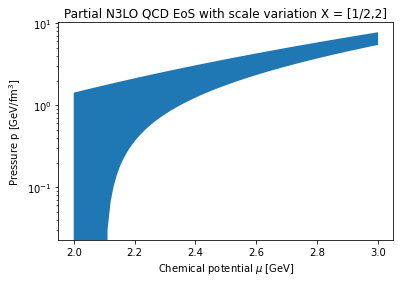

In [17]:
from pQCD import pQCD

mu_grid = np.linspace(2.0,3,100) #Grid in chemical potential in [GeV]

pQCD1 = pQCD(1/2) #X=1/2 
pQCD2 = pQCD(2) #X=2 

plt.fill_between(mu_grid,np.vectorize(pQCD1.pressure)(mu_grid),np.vectorize(pQCD2.pressure)(mu_grid))
plt.yscale('log')
plt.ylabel('Pressure p [GeV/fm$^3$]')
plt.xlabel('Chemical potential $\mu$ [GeV]')
plt.title('Partial N3LO QCD EoS with scale variation X = [1/2,2]')
plt.show()

# Check consistency of EoS with QCD constraints

The pQCD class also contains function `constraints`. This function checks whether the given point can be connected to the QCD limit in a casual and consistent way as defined in [1] and [2]. 

The input is `(e0, p0, n0, muQCD = 2.6, cs2=1)`, where `e0, p0, n0` is the given point you check. Here
* `e0` is the energy density in GeV/fm$^3$, 
* `p0` is pressure in GeV/fm$^3$, 
* `n0` is number density in fm$^{-3}$,

and the optional parameters are
* `muQCD`, the fixed scale $\mu_H$, with default value `muQCD` = 2.6 GeV, as discussed in [2]. 
* `cs2` is the (maximal) limiting value of the sound speed squared between the point you check and `muQCD`, with the default value taken to be 1. 

In [18]:
from pQCD import pQCD
pQCD = pQCD(1)
print('Check consistency of the point e = 1.1 GeV/fm3, p = 1.0 GeV/fm3 and n = 5ns : ', pQCD.constraints(e0=1.1,p0=1,n0=5*0.16))
print('Check consistency of the point e = 1.0 GeV/fm3, p = 0.6 GeV/fm3 and n = 5ns : ', pQCD.constraints(e0=1,p0=0.6,n0=5*0.16))
print('Check consistency of the point e = 1.0 GeV/fm3, p = 0.3 GeV/fm3 and n = 5ns : ', pQCD.constraints(e0=1,p0=0.3,n0=5*0.16))

Check consistency of the point e = 1.1 GeV/fm3, p = 1.0 GeV/fm3 and n = 5ns :  False
Check consistency of the point e = 1.0 GeV/fm3, p = 0.6 GeV/fm3 and n = 5ns :  True
Check consistency of the point e = 1.0 GeV/fm3, p = 0.3 GeV/fm3 and n = 5ns :  True


# Likelihood function for QCD accounting for the scale-variation error

We perform Monte-Carlo integration by randomly drawing $X$ values from the log-uniform distribution in the range [1/2,2] and counting how frequently the given point satisfies the QCD condition


In [19]:
from pQCD import pQCD

N = 1000 
weight1 = np.zeros(N)
weight2 = np.zeros(N)
weight3 = np.zeros(N)

for i in range(1000):
    
    X = np.random.uniform( np.log(1/2), np.log(2) ) #Log-linear distribution
    pQCDX = pQCD(np.exp(X)) #redefine class with new X
    
    # for each X assign 0 or 1 for given point
    weight1[i] = int(pQCDX.constraints(e0=1.1,p0=1,n0=5*0.16)) 
    weight2[i] = int(pQCDX.constraints(e0=1,p0=0.6,n0=5*0.16))
    weight3[i] = int(pQCDX.constraints(e0=1,p0=0.3,n0=5*0.16))

#Averaging over all X
print('Bayesian weight of the point e = 1.1 GeV/fm3, p = 1.0 GeV/fm3 and n = 5ns : ',weight1.mean())
print('Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.6 GeV/fm3 and n = 5ns : ',weight2.mean())
print('Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.3 GeV/fm3 and n = 5ns : ',weight3.mean())

Bayesian weight of the point e = 1.1 GeV/fm3, p = 1.0 GeV/fm3 and n = 5ns :  0.0
Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.6 GeV/fm3 and n = 5ns :  0.869
Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.3 GeV/fm3 and n = 5ns :  1.0


# (*Optional*) Agressive QCD constraints

We can make the QCD cut more aggresive. For example, we can impose that the speed of sound squared be less than 1/3 in the region from the given point all the way to `muQCD`. 

In addition we can change the fixed scale `muQCD` to be 2.4 GeV instead of the default 2.6 GeV, as discussed in [2].

In [40]:
from pQCD import pQCD

N = 1000 
weight1 = np.zeros(N)
weight2 = np.zeros(N)
weight3 = np.zeros(N)

for i in range(1000):
    
    X = np.random.uniform( np.log(1/2), np.log(2) )
    pQCDX = pQCD(np.exp(X))

    weight1[i] = int(pQCDX.constraints(e0=1.1,p0=1,n0=5*0.16, muQCD = 2.4, cs2 = 1/3)) 
    weight2[i] = int(pQCDX.constraints(e0=1,p0=0.6,n0=5*0.16, muQCD = 2.4, cs2 = 1/3))
    weight3[i] = int(pQCDX.constraints(e0=1,p0=0.3,n0=5*0.16, muQCD = 2.4, cs2 = 1/3))

print('Bayesian weight of the point e = 1.1 GeV/fm3, p = 1.0 GeV/fm3 and n = 5ns : ',weight1.mean())
print('Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.6 GeV/fm3 and n = 5ns : ',weight2.mean())
print('Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.3 GeV/fm3 and n = 5ns : ',weight3.mean())

Bayesian weight of the point e = 1.1 GeV/fm3, p = 1.0 GeV/fm3 and n = 5ns :  0.0
Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.6 GeV/fm3 and n = 5ns :  0.2
Bayesian weight of the point e = 1.0 GeV/fm3, p = 0.3 GeV/fm3 and n = 5ns :  0.45


# If you use the QCD likelihood function, please cite:

**[1]** [`How perturbative QCD constrains the Equation of State at Neutron-Star densities`](https://arxiv.org/abs/2111.05350)
```
@article{Komoltsev:2021jzg,
    author = "Komoltsev, Oleg and Kurkela, Aleksi",
    title = "{How perturbative QCD constrains the Equation of State at Neutron-Star densities}",
    eprint = "2111.05350",
    archivePrefix = "arXiv",
    primaryClass = "nucl-th",
    month = "11",
    year = "2021"
}
```
**[2]** [`Ab-initio QCD calculations impact the inference of the neutron-star-matter equation of state`]()
```

@article{}
```
**[3]** [`Cold quark matter at N3LO: Soft contributions`](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.104.074015)
```
@article{Gorda:2021kme,
    author = {Gorda, Tyler and Kurkela, Aleksi and Paatelainen, Risto and S\"appi, Saga and Vuorinen, Aleksi},
    title = "{Cold quark matter at N3LO: Soft contributions}",
    eprint = "2103.07427",
    archivePrefix = "arXiv",
    primaryClass = "hep-ph",
    reportNumber = "HIP-2021-10/TH",
    doi = "10.1103/PhysRevD.104.074015",
    journal = "Phys. Rev. D",
    volume = "104",
    number = "7",
    pages = "074015",
    year = "2021"
}
```

### For any questions or suggestions: oleg.komoltsev@uis.no